# Anexa 2

## Clasificarea zgomotelor cardiace din inregistrari PCG

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

import pywt
import scipy
from scipy.io import loadmat
from scipy.io import wavfile
from scipy.io.wavfile import write 
from scipy.signal import resample as scipy_resample

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc, roc_auc_score

from sklearn.ensemble import AdaBoostClassifier
import joblib
import time

## SVM
### Training set B

In [ ]:
training_b_df = pd.read_csv('features/training-b.csv')
training_b_df = training_b_df.fillna(0) #replace NaN values with 0

#select labels 
labels_tr_b = np.asarray(training_b_df.loc[:,'label']) 

#select features
all_features_tr_b = np.asarray(training_b_df[training_b_df.columns[2:]])


x = all_features_tr_b
y = labels_tr_b

In [ ]:
"""
-------SVM
-------80% test - 20% train
-------linear kernel
"""

kernel = 'linear'
test_set_percent = 0.2

x_train_80, x_test_20, y_train_80, y_test_20 = train_test_split(x, y, test_size = test_set_percent, shuffle = 'true', random_state = 4)

svm_20_linear_b = SVC(kernel = kernel)
start = time.time()
svm_20_linear_b.fit(x_train_80, y_train_80)
print("training time: ", time.time()-start, " s")
y_pred_20_linear_b = svm_20_linear_b.predict(x_test_20)

training time:  916.838860988617  s


In [ ]:
# save the model to disk
filename = 'svc_linear_b.sav'
joblib.dump(svm_20_linear_b, filename)

['svc_linear_b.sav']

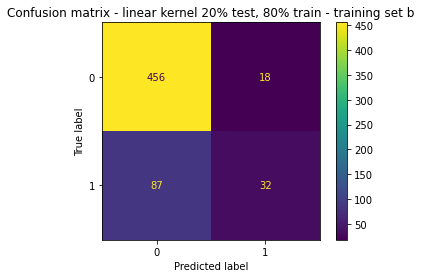

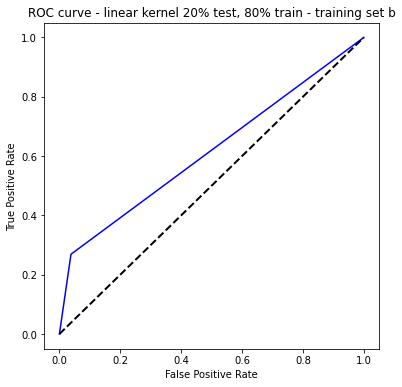

In [ ]:
#performance metrics
accuracy_20_linear_b = accuracy_score(y_test_20, y_pred_20_linear_b)*100
precision_20_linear_b = precision_score(y_test_20, y_pred_20_linear_b)*100
recall_20_linear_b = recall_score(y_test_20, y_pred_20_linear_b)*100 

confusion_matrix_20_linear_b = confusion_matrix(y_test_20, y_pred_20_linear_b, labels=None, sample_weight=None, normalize=None)
confusion_matrix_20_linear_b_display = ConfusionMatrixDisplay(confusion_matrix_20_linear_b, display_labels = None)
confusion_matrix_20_linear_b_display.plot()
plt.title('Confusion matrix - linear kernel 20% test, 80% train - training set b')


fpr, tpr, threshold = roc_curve(y_test_20, y_pred_20_linear_b)
roc_auc_20_linear_b = auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_20_linear_b)
plt.title('ROC curve - linear kernel 20% test, 80% train - training set b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.show()

In [ ]:
"""
-------SVM
-------80% test - 20% train
-------rbf kernel
"""

kernel = 'rbf'
test_set_percent = 0.2

x_train_80, x_test_20, y_train_80, y_test_20 = train_test_split(x, y, test_size = test_set_percent, shuffle = 'true', random_state = 4)

svm_20_rbf_b = SVC(kernel = kernel)
start = time.time()
svm_20_rbf_b.fit(x_train_80, y_train_80)
print("training time: ", time.time()-start, " s")
y_pred_20_rbf_b = svm_20_rbf_b.predict(x_test_20)

training time:  0.32743287086486816  s


In [ ]:
# save the model to disk
filename = 'svc_rbf_b.sav'
joblib.dump(svm_20_rbf_b, filename)

['svc_rbf_b.sav']

C:\Users\crist\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


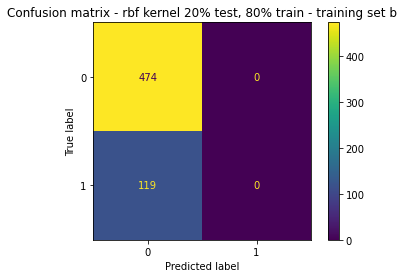

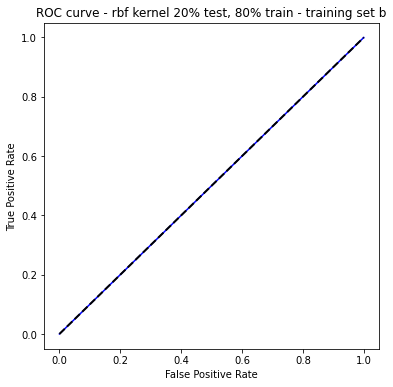

In [ ]:
#performance metrics
accuracy_20_rbf_b = accuracy_score(y_test_20, y_pred_20_rbf_b)*100
precision_20_rbf_b = precision_score(y_test_20, y_pred_20_rbf_b)*100
recall_20_rbf_b = recall_score(y_test_20, y_pred_20_rbf_b)*100 

confusion_matrix_20_rbf_b = confusion_matrix(y_test_20, y_pred_20_rbf_b, labels=None, sample_weight=None, normalize=None)
confusion_matrix_20_rbf_b_display = ConfusionMatrixDisplay(confusion_matrix_20_rbf_b, display_labels = None)
confusion_matrix_20_rbf_b_display.plot()
plt.title('Confusion matrix - rbf kernel 20% test, 80% train - training set b')


fpr, tpr, threshold = roc_curve(y_test_20, y_pred_20_rbf_b)
roc_auc_20_rbf_b = auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_20_rbf_b)
plt.title('ROC curve - rbf kernel 20% test, 80% train - training set b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.show()

## SVM
### Training set F

In [ ]:
"""
-------SVM
-------80% test - 20% train
-------linear kernel
"""

file_path = 'features/training-f.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)
#print(df.head())

# Check for NaN values
nan_values = df.isna().any()

# Remove rows with NaN values
df.dropna(axis=0, inplace=True)

# Remove columns with NaN values
df.dropna(axis=1, inplace=True)

# Extract the labels column from the DataFrame
labels = df['label']
#print(labels)

# Extract the feature columns from the DataFrame
features = df.drop('label', axis=1)
features = features.drop('signal', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test_20 = train_test_split(features, labels, test_size=0.2, random_state=33)

# Create an SVM classifier
svc = SVC(kernel='linear', probability=True)
print('Model fit ... ')
start = time.time()
svc.fit(X_train, y_train)
print('Model fit done')
print("training time: ", time.time()-start, " s")
y_pred_20_linear_f = svc.predict(X_test)

Model fit ... 
Model fit done
training time:  3613.978452682495  s


In [ ]:
# save the model to disk
filename = 'svc_linear_f.sav'
joblib.dump(svc, filename)

['svc_linear_f.sav']

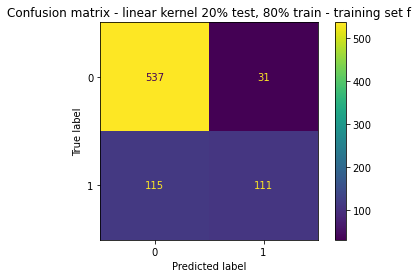

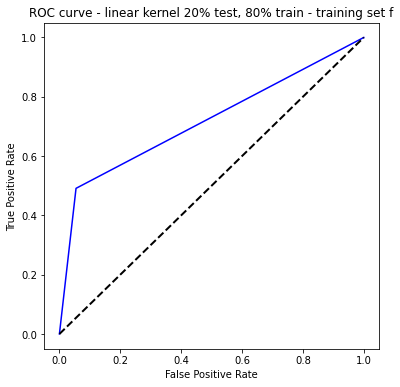

In [ ]:
#performance metrics
accuracy_20_linear_f = accuracy_score(y_test_20, y_pred_20_linear_f)*100
precision_20_linear_f = precision_score(y_test_20, y_pred_20_linear_f)*100
recall_20_linear_f = recall_score(y_test_20, y_pred_20_linear_f)*100 

confusion_matrix_20_linear_f = confusion_matrix(y_test_20, y_pred_20_linear_f, labels=None, sample_weight=None, normalize=None)
confusion_matrix_20_linear_f_display = ConfusionMatrixDisplay(confusion_matrix_20_linear_f, display_labels = None)
confusion_matrix_20_linear_f_display.plot()
plt.title('Confusion matrix - linear kernel 20% test, 80% train - training set f')


fpr, tpr, threshold = roc_curve(y_test_20, y_pred_20_linear_f)
roc_auc_20_linear_f = auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_20_linear_f)
plt.title('ROC curve - linear kernel 20% test, 80% train - training set f')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.show()

In [ ]:
"""
-------SVM
-------80% test - 20% train
-------rbf kernel
"""

file_path = 'features/training-f.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)
#print(df.head())

# Check for NaN values
nan_values = df.isna().any()

# Remove rows with NaN values
df.dropna(axis=0, inplace=True)

# Remove columns with NaN values
df.dropna(axis=1, inplace=True)

# Extract the labels column from the DataFrame
labels = df['label']
#print(labels)

# Extract the feature columns from the DataFrame
features = df.drop('label', axis=1)
features = features.drop('signal', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test_20 = train_test_split(features, labels, test_size=0.2, random_state=33)

# Create an SVM classifier
svc = SVC(kernel='rbf', probability=True)
print('Model fit ... ')
start = time.time()
svc.fit(X_train, y_train)
print('Model fit done')
print("training time: ", time.time()-start, " s")
y_pred_20_rbf_f = svc.predict(X_test)

Model fit ... 
Model fit done
training time:  1.6420068740844727  s


In [ ]:
# save the model to disk
filename = 'svc_rbf_f.sav'
joblib.dump(svc, filename)

['svc_rbf_f.sav']

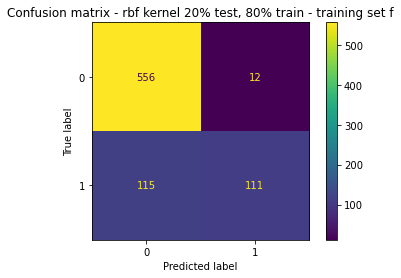

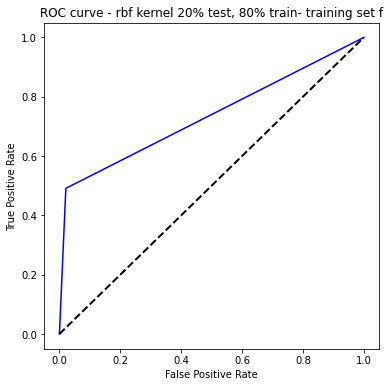

In [ ]:
#performance metrics
accuracy_20_rbf_f = accuracy_score(y_test_20, y_pred_20_rbf_f)*100
precision_20_rbf_f = precision_score(y_test_20, y_pred_20_rbf_f)*100
recall_20_rbf_f = recall_score(y_test_20, y_pred_20_rbf_f)*100 

confusion_matrix_20_rbf_f = confusion_matrix(y_test_20, y_pred_20_rbf_f, labels=None, sample_weight=None, normalize=None)
confusion_matrix_20_rbf_f_display = ConfusionMatrixDisplay(confusion_matrix_20_rbf_f, display_labels = None)
confusion_matrix_20_rbf_f_display.plot()
plt.title('Confusion matrix - rbf kernel 20% test, 80% train - training set f')


fpr, tpr, threshold = roc_curve(y_test_20, y_pred_20_rbf_f)
roc_auc_20_rbf_f = auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_20_rbf_f)
plt.title('ROC curve - rbf kernel 20% test, 80% train- training set f')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.show()

## AdaBoost
### Training set d

In [ ]:
"""
-------Adaboost
-------80% test - 20% train
-------DecisionTreeClassifier estimator
"""
dataset = pd.read_csv('features/training-d.csv')
value = 0
dataset.fillna(value, inplace=True)
X_init = dataset.drop('signal', axis=1)
X = X_init.drop('label',axis=1)
y = dataset.label
# Split dataset into training set and test set
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X, y, test_size=0.25, random_state=42) 

# Create adaboost classifer object
abc_d = AdaBoostClassifier(n_estimators=55,  learning_rate=1)
# Train Adaboost Classifer
start = time.time()
model = abc_d.fit(X_train_20, y_train_20)
print("training time: ", time.time()-start, " s")

#Predict the response for test dataset
y_pred_20_ada_d = model.predict(X_test_20)

training time:  0.2701444625854492  s


In [ ]:
# save the model to disk
filename = 'ada_d.sav'
joblib.dump(abc_d, filename)

['ada_d.sav']

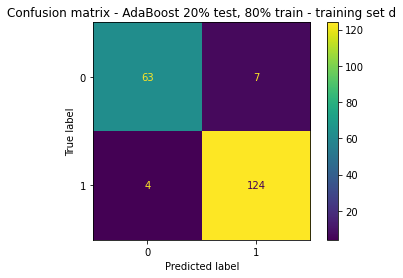

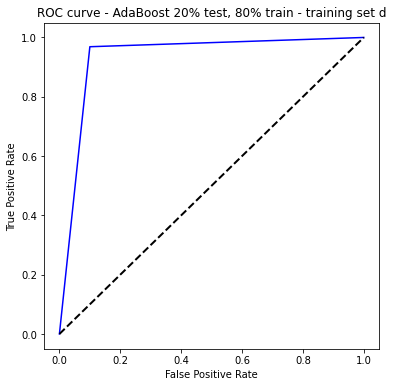

In [ ]:
#performance metrics
accuracy_20_ada_d = accuracy_score(y_test_20, y_pred_20_ada_d)*100
precision_20_ada_d = precision_score(y_test_20, y_pred_20_ada_d)*100
recall_20_ada_d = recall_score(y_test_20, y_pred_20_ada_d)*100 

confusion_matrix_20_ada_d = confusion_matrix(y_test_20, y_pred_20_ada_d, labels=None, sample_weight=None, normalize=None)
confusion_matrix_20_ada_d_display = ConfusionMatrixDisplay(confusion_matrix_20_ada_d, display_labels = None)
confusion_matrix_20_ada_d_display.plot()
plt.title('Confusion matrix - AdaBoost 20% test, 80% train - training set d')


fpr, tpr, threshold = roc_curve(y_test_20, y_pred_20_ada_d)
roc_auc_20_ada_d = auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_20_ada_d)
plt.title('ROC curve - AdaBoost 20% test, 80% train - training set d')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.show()

In [ ]:
"""
-------Adaboost
-------80% test - 20% train
-------DecisionTreeClassifier estimator
"""

dataset = pd.read_csv('features/training-c.csv')
value = 0
dataset.fillna(value, inplace=True)
X_init = dataset.drop('signal', axis=1)
X = X_init.drop('label',axis=1)
y = dataset.label
# Split dataset into training set and test set
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X, y, test_size=0.25, random_state=42) 

# Create adaboost classifer object
abc_c = AdaBoostClassifier(n_estimators=55,  learning_rate=1)
# Train Adaboost Classifer
start = time.time()
model = abc_c.fit(X_train_20, y_train_20)
print("training time: ", time.time()-start, " s")

#Predict the response for test dataset
y_pred_20_ada_c = model.predict(X_test_20)

training time:  0.6040716171264648  s


In [ ]:
# save the model to disk
filename = 'ada_c.sav'
joblib.dump(abc_c, filename)

['ada_c.sav']

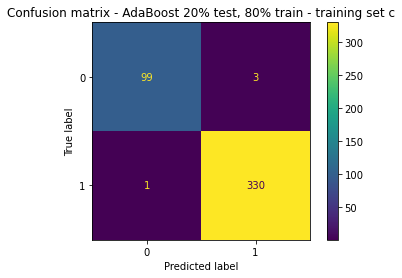

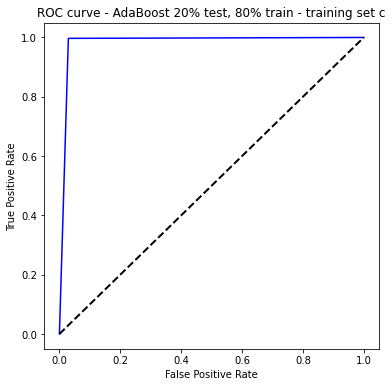

In [ ]:
#performance metrics
accuracy_20_ada_c = accuracy_score(y_test_20, y_pred_20_ada_c)*100
precision_20_ada_c = precision_score(y_test_20, y_pred_20_ada_c)*100
recall_20_ada_c = recall_score(y_test_20, y_pred_20_ada_c)*100 

confusion_matrix_20_ada_c = confusion_matrix(y_test_20, y_pred_20_ada_c, labels=None, sample_weight=None, normalize=None)
confusion_matrix_20_ada_c_cisplay = ConfusionMatrixDisplay(confusion_matrix_20_ada_c, display_labels = None)
confusion_matrix_20_ada_c_cisplay.plot()
plt.title('Confusion matrix - AdaBoost 20% test, 80% train - training set c')


fpr, tpr, threshold = roc_curve(y_test_20, y_pred_20_ada_c)
roc_auc_20_ada_c = auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_20_ada_c)
plt.title('ROC curve - AdaBoost 20% test, 80% train - training set c')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.show()

In [ ]:
performance_metrics = {'Algorithm': ['SVM-linear-trainingset_b', 'SVM-linear-trainingset_f', 'SVM-rbf-trainingset_f', 'AdaBoost-tariningset_d', 'Adaboost-trainingset_c'],
                       'accuracy': [accuracy_20_linear_b, accuracy_20_linear_f, accuracy_20_rbf_f, accuracy_20_ada_d, accuracy_20_ada_c],
                       'precision': [precision_20_linear_b, precision_20_linear_f, precision_20_rbf_f, precision_20_ada_d, precision_20_ada_c],
                       'recall': [recall_20_linear_b, recall_20_linear_f, recall_20_rbf_f, recall_20_ada_d, recall_20_ada_c]}
performance_metrics = pd.DataFrame(data=performance_metrics)
#save metrics to csv
performance_metrics.to_csv('performance_metrics.csv')

In [ ]:
def highlight_max(s):
    '''
    highlight the maximum value in a Series yellow.
    '''
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]

performance_metrics.style.apply(highlight_max)

,Algorithm,accuracy,precision,recall
0,SVM-linear-trainingset_b,82.293423,64.000000,26.890756
1,SVM-linear-trainingset_f,81.612091,78.169014,49.115044
2,SVM-rbf-trainingset_f,84.005038,90.243902,49.115044
3,AdaBoost-tariningset_d,94.444444,94.656489,96.875000
4,Adaboost-trainingset_c,99.076212,99.099099,99.697885
